In [2]:
import pandas as pd
import os
import multiqc
import matplotlib.pyplot as plt
import numpy as np

## MultiQC

From STAR paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4631051/

The most important metric is the **“Uniquely mapped reads %”**, or mapping rate, which is defined as a proportion of uniquely mapped reads out of all input reads. For a very good library it exceeds 90%, and for good libraries it should be above 80%. Low mapping rates (<50%) are indicative of a problem with library preparations or data processing:

Insufficient depletion of ribosomal RNA. Ribosomal RNAs comprise more than 90% of all RNA molecules in the cell. In a typical RNA-seq library preparation rRNAs are depleted either by ribo-depletion techniques (customary for total RNA libraries), by poly-A+ selection, or by poly-dT reverse transcription priming. If the rRNA depletion does not work sufficiently well, a substantial number of reads may be emanating from the rRNA transcripts. Most of the rRNA contain multiple highly sequence-similar paralogs, and hence RNA-seq reads will be mapped to multiple loci. Therefore, high percentage (>15%) of multi-mapping reads **“% of reads mapped to multiple loci”** is indicative of insufficient depletion of rRNA.

Poor sequencing quality. The sequencing error rates can be estimated from the **“Mismatch rate per base, %”**, **“Deletion rate per base”**, **“Insertion rate per base”**. These metrics are typically dominated by sequencing errors, but also include the genotype variants (i.e. sequence differences of individual under study from the consensus genome). For Illumina sequencing, presently the typical mismatch error rate are <0.5% and indel error rates <0.05%. Higher error rates may be indicative of the poor sequencing qualities. Another indicator of poor sequencing quality is a significant reduction of “Average mapped length” with respect to “Average input read length”. Note that for paired-end data these quantities refer to the total paired-end read length. It is recommended that sequencing quality is assessed by plotting the distribution of “quality scores” from the FASTQ files. Poor sequencing quality is likely to result in increased number of unmapped reads.

Exogenous RNA/DNA contamination. RNA/DNA from divergent species will not map to the reference genome, thus increasing the proportion of unmapped reads. If the sequencing quality of the reads is good (see above), the large **“% of reads unmapped: too short”** or **“% of reads unmapped: other”** (>15%) may be indicative of exogenous RNA/DNA contamination. In this case it is recommended to BLAST several of the unmapped reads to NCBI sequence database to identify possible sources of contamination.

Computational processing problems. Usually, computational processing problems result in abortive runs and do not generate mapping statistics output (see the Troubleshooting section). However, in some cases the mapping job will complete successfully yielding extremely low mapping rate (<5%). Some of the typical mistakes include (i) using a wrong species genome indices directory; (ii) using the identical files as read-1 and read-2.

In [7]:
multiqc.run('../output')

/// ]8;id=282799;https://multiqc.info\MultiQC]8;;\ 🔍 | v1.14

|           multiqc | Search path : /cluster/tufts/levinlab/rellis01/ngs/anthrobot_rnaseq/output


Output()

In [2]:
mstar = pd.read_csv('multiqc_data/multiqc_star.txt', sep='\t')

In [3]:
mstar.head()

,Sample,total_reads,avg_input_read_length,uniquely_mapped,uniquely_mapped_percent,avg_mapped_read_length,num_splices,num_annotated_splices,num_GTAG_splices,num_GCAG_splices,...,multimapped,multimapped_percent,multimapped_toomany,multimapped_toomany_percent,unmapped_mismatches_percent,unmapped_tooshort_percent,unmapped_other_percent,unmapped_mismatches,unmapped_tooshort,unmapped_other
0,S1_S1,229906578.0,101.0,202172508.0,87.94,99.87,40991798.0,40554481.0,40502859.0,320604.0,...,19460280.0,8.46,323576.0,0.14,0.0,3.44,0.02,0,7904259,45955
1,S2_S2,136063785.0,101.0,124523276.0,91.52,99.88,24639567.0,24384538.0,24350942.0,189587.0,...,8473714.0,6.23,197843.0,0.15,0.0,2.09,0.02,0,2841758,27194
2,S3_S3,303515883.0,101.0,272517015.0,89.79,99.89,55109094.0,54509976.0,54446625.0,423611.0,...,23931764.0,7.88,436168.0,0.14,0.0,2.16,0.02,0,6570102,60834
3,S4_S4,207643786.0,101.0,187760890.0,90.42,99.83,22558018.0,22118492.0,22205496.0,195317.0,...,14363660.0,6.92,439604.0,0.21,0.0,2.40,0.04,0,4996359,83273
4,S5_S5,249108327.0,101.0,225564323.0,90.55,99.80,24732823.0,24157878.0,24319554.0,220951.0,...,14360091.0,5.76,556547.0,0.22,0.0,3.42,0.05,0,8503052,124314


In [4]:
mstar.columns

Index(['Sample', 'total_reads', 'avg_input_read_length', 'uniquely_mapped',
       'uniquely_mapped_percent', 'avg_mapped_read_length', 'num_splices',
       'num_annotated_splices', 'num_GTAG_splices', 'num_GCAG_splices',
       'num_ATAC_splices', 'num_noncanonical_splices', 'mismatch_rate',
       'deletion_rate', 'deletion_length', 'insertion_rate',
       'insertion_length', 'multimapped', 'multimapped_percent',
       'multimapped_toomany', 'multimapped_toomany_percent',
       'unmapped_mismatches_percent', 'unmapped_tooshort_percent',
       'unmapped_other_percent', 'unmapped_mismatches', 'unmapped_tooshort',
       'unmapped_other'],
      dtype='object')

In [5]:
print(
    min(mstar.uniquely_mapped_percent),
    max(mstar.multimapped_percent),
    max(mstar.mismatch_rate),
    max(mstar.insertion_rate),
    max(mstar.deletion_rate),
    max(mstar.unmapped_tooshort_percent),
    max(mstar.unmapped_other_percent)
)

33.02 8.46 0.44 0.01 0.01 64.57 0.05


In [12]:
mstar[(mstar.uniquely_mapped_percent < 80) | 
      (mstar.multimapped_percent > 15) | 
      (mstar.mismatch_rate > 0.5) | 
      (mstar.insertion_rate > 0.05) | 
      (mstar.deletion_rate > 0.05) |
      (mstar.unmapped_tooshort_percent > 15) | 
      (mstar.unmapped_other_percent > 15)
      ]

,Sample,total_reads,avg_input_read_length,uniquely_mapped,uniquely_mapped_percent,avg_mapped_read_length,num_splices,num_annotated_splices,num_GTAG_splices,num_GCAG_splices,...,multimapped,multimapped_percent,multimapped_toomany,multimapped_toomany_percent,unmapped_mismatches_percent,unmapped_tooshort_percent,unmapped_other_percent,unmapped_mismatches,unmapped_tooshort,unmapped_other
9,Undetermined_S0,168747860.0,101.0,55719961.0,33.02,99.76,8387614.0,8253758.0,8276409.0,67780.0,...,3918401.0,2.32,117219.0,0.07,0.0,64.57,0.01,0,108975402,16877


## Read collation

In [13]:
os.listdir("../output")

['S1_S1Aligned.sortedByCoord.out.bam',
 'S1_S1Log.final.out',
 'S1_S1Log.out',
 'S1_S1Log.progress.out',
 'S1_S1ReadsPerGene.out.tab',
 'S1_S1SJ.out.tab',
 'S1_S1_STARtmp',
 'S2_S2Aligned.sortedByCoord.out.bam',
 'S2_S2Log.final.out',
 'S2_S2Log.out',
 'S2_S2Log.progress.out',
 'S2_S2ReadsPerGene.out.tab',
 'S2_S2SJ.out.tab',
 'S2_S2_STARtmp',
 'S3_S3Aligned.sortedByCoord.out.bam',
 'S3_S3Log.final.out',
 'S3_S3Log.out',
 'S3_S3Log.progress.out',
 'S3_S3ReadsPerGene.out.tab',
 'S3_S3SJ.out.tab',
 'S3_S3_STARtmp',
 'S4_S4Aligned.sortedByCoord.out.bam',
 'S4_S4Log.final.out',
 'S4_S4Log.out',
 'S4_S4Log.progress.out',
 'S4_S4ReadsPerGene.out.tab',
 'S4_S4SJ.out.tab',
 'S4_S4_STARtmp',
 'S5_S5Aligned.sortedByCoord.out.bam',
 'S5_S5Log.final.out',
 'S5_S5Log.out',
 'S5_S5Log.progress.out',
 'S5_S5ReadsPerGene.out.tab',
 'S5_S5SJ.out.tab',
 'S5_S5_STARtmp',
 'S6_S6Aligned.sortedByCoord.out.bam',
 'S6_S6Log.final.out',
 'S6_S6Log.out',
 'S6_S6Log.progress.out',
 'S6_S6ReadsPerGene.out.tab',


# Note, July 18th, 2023: The library prep was STRANDED. I summed the counts in both strands (i.e., the last two columns of each ReadsPerGene.out.tab file) and it was clear that the antisense strand was sequenced, so I used this for the raw counts.

In [73]:
count_lst = []
count_cols = []

strand_column = 3 # antisense strand counts



for i, file in enumerate(os.listdir('../output')):
    if file.endswith('ReadsPerGene.out.tab'):
        counts = pd.read_csv(f'../output/{file}', sep='\t')
        if len(count_lst)==0:
            count_lst.append(counts.iloc[3:,[0,strand_column]])
            first_col = counts.iloc[3:,0]
        else:
            count_lst.append(counts.iloc[3:,strand_column])

            # THIS MUST OUTPUT TRUE ONLY TO CONFIRM GENES ARE IN THE RIGHT ORDER
            print(np.array_equal(first_col, counts.iloc[3:,0]))
        sampleid = file[:file.index("Reads")]
        underscore_index = sampleid.index('_')
        sampleid = sampleid[:underscore_index]
        
        count_cols.append(sampleid)
    else:
        continue
        
df = pd.concat(count_lst, axis=1).reset_index(drop=True) #reset.index is for resetting the index numbers
df.columns = ['gene'] + count_cols

True
True
True
True
True
True
True
True
True


In [55]:
df.to_csv('../counts/raw_counts.csv', index=None)

In [67]:
# meanGreaterThan10 = df.iloc[np.where(np.mean(df.iloc[:,2:].T) > 10)[0],:]
# meanGreaterThan10.to_csv('meanGreaterThan10_counts.csv', index=None)

## pair-wise sample correlations 

In [3]:
raw_counts = pd.read_csv('../counts/raw_counts.csv')
metadata = pd.read_csv('../metadata/metadata_cleaned.csv')

In [70]:
raw_counts.head()

,gene,S1,S2,S3,S4,S5,S6,S7,S8,S9,Undetermined
0,ENSG00000279928,12,0,12,14,32,3,0,0,0,2
1,ENSG00000228037,0,0,0,36,80,26,0,269,116,14
2,ENSG00000142611,1282,783,1569,1554,821,1305,250,731,493,310
3,ENSG00000284616,0,0,3,0,0,0,0,0,0,0
4,ENSG00000157911,3575,1960,4328,1370,1496,1615,1003,2802,2283,703


In [6]:
metadata.head()

,Lane,SampleID,Index,# Reads,# Perfect Index Reads,# One Mismatch Index Reads,# Two Mismatch Index Reads,% Reads,% Perfect Index Reads,% One Mismatch Index Reads,% Two Mismatch Index Reads,Description
0,1,S1,TCAATGGAGA-GTTGTAGTGC,113486868,109633923,3852945,0,0.1088,0.9660,0.0340,0,NHBE
1,1,S2,AGTACTCATG-ACCACGACAT,67264917,64426831,2838086,0,0.0645,0.9578,0.0422,0,NHBE
2,1,S3,ATCGGCGAAG-AATTCTTGGA,150233831,147449976,2783855,0,0.1440,0.9815,0.0185,0,NHBE
3,1,S4,CTGCGTTACC-TCGAGCCATA,102635236,100363038,2272198,0,0.0984,0.9779,0.0221,0,Anthrobots_1
4,1,S5,ATGTAACGTT-CAGCAATCGT,123086718,120792575,2294143,0,0.1180,0.9814,0.0186,0,Anthrobots_1


In [7]:
raw_counts = raw_counts.rename(columns={'S1':'NHBE_1', 'S2':'NHBE_2', 'S3':'NHBE_3', 
                           'S4':'Young_Anthro_1', 'S5':'Young_Anthro_2', 'S6':'Young_Anthro_3',
                           'S7':'Old_Anthro_1','S8':'Old_Anthro_2', 'S9':'Old_Anthro_3'})

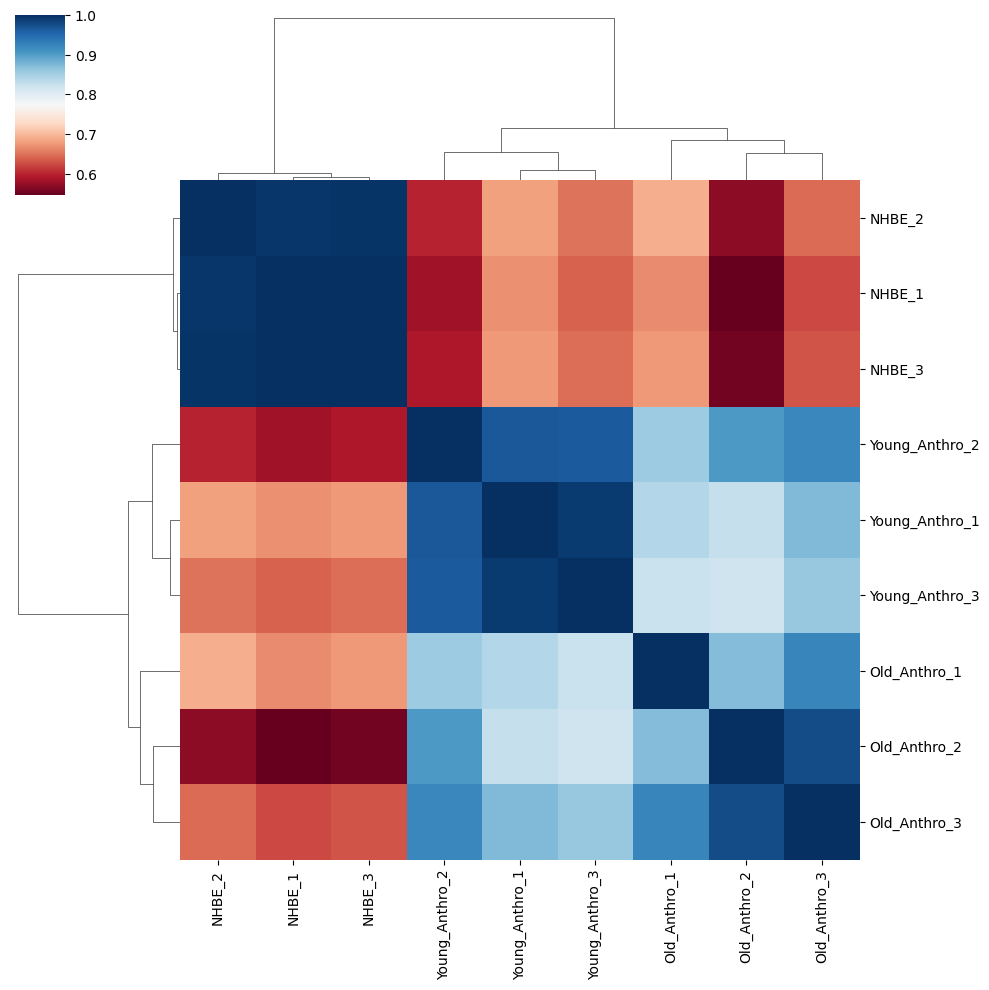

In [9]:
import seaborn as sns
sns.clustermap(raw_counts.iloc[:,1:-1].corr(),cmap='RdBu')
plt.savefig('sample_sample_correlations.png', dpi=300)